## Домашнее задание №4 - Функции нескольких переменных

### Задание 1. 

Постройте трехмерный график функции

$f(x)=x_2^2-x_1^2 x_2 + 2 x_1 x_2$

А также график линий уровня с уровнями {$1,5,10$}

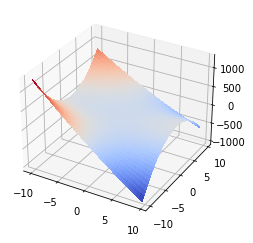

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def func_01(x, y):
    return x**2-x*y**2+2*x*y

fig = plt.figure()
ax = fig.gca(projection = '3d')

X = np.arange(-10,10,0.5)
Y = np.arange(-10,10,0.5)
X, Y = np.meshgrid(X,Y)
Z = func_01(X,Y)
Z
surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, antialiased = False)


Text(0.5, 1.0, 'Our plot')

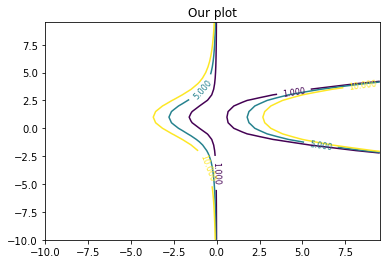

In [29]:
fig, ax = plt.subplots()
CS = ax.contour(X ,Y ,Z, levels=[1, 5, 10])
ax.clabel(CS, inline = True, fontsize = 8)
ax.set_title('Our plot')

### Задание 2.

Вычислить вектор градиента и матрицу Гессе для функции:

$f(x)=2x_1^3-3x_1 x_2+2x_2 x_3^2-x_2^3$

в точке $M=(2,1,1)$.

In [3]:
from scipy import optimize

def func_02(x):
    return 2*x[0]**3-3*x[0]*x[1]+2*x[1]*x[2]**2-x[1]**3

m = np.array([2,1,1])

optimize.approx_fprime(m, func_02, 1e-8)

array([21.00000009, -7.00000009,  4.        ])

In [19]:
import sympy as sym
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')
x3 = sym.Symbol('x3')

f = 2*x1**3-3*x1*x2+2*x2*x3**2-x2**3

H11 = sym.diff(f,x1,x1)
H12 = sym.diff(f,x1,x2)
H13 = sym.diff(f,x1,x3)
H21 = sym.diff(f,x2,x1)
H22 = sym.diff(f,x2,x2)
H23 = sym.diff(f,x2,x3)
H31 = sym.diff(f,x3,x1)
H32 = sym.diff(f,x3,x2)
H33 = sym.diff(f,x3,x3)

H = np.array([[H11,H12,H13],
     [H21,H22,H23],
     [H31,H32,H33]])
H

array([[12*x1, -3, 0],
       [-3, -6*x2, 4*x3],
       [0, 4*x3, 4*x2]], dtype=object)

### Задание 3.

Для функции из задания 2 с использованием критерия Сильвестра определить является ли матрица Гессе положительно определенной в точке $K=(2,-5,-3)$.



In [29]:
H11 = sym.diff(f,x1,x1).subs([(x1,2),(x2,-5),(x3,-3)])
H12 = sym.diff(f,x1,x2).subs([(x1,2),(x2,-5),(x3,-3)])
H13 = sym.diff(f,x1,x3).subs([(x1,2),(x2,-5),(x3,-3)])
H21 = sym.diff(f,x2,x1).subs([(x1,2),(x2,-5),(x3,-3)])
H22 = sym.diff(f,x2,x2).subs([(x1,2),(x2,-5),(x3,-3)])
H23 = sym.diff(f,x2,x3).subs([(x1,2),(x2,-5),(x3,-3)])
H31 = sym.diff(f,x3,x1).subs([(x1,2),(x2,-5),(x3,-3)])
H32 = sym.diff(f,x3,x2).subs([(x1,2),(x2,-5),(x3,-3)])
H33 = sym.diff(f,x3,x3).subs([(x1,2),(x2,-5),(x3,-3)])
H1 = H11
H2 = np.array([[H11,H12],[H21,H22]],dtype = int)
H3 = np.array([[H11,H12,H13],[H21,H22,H23],[H31,H32,H33]],dtype = int)
print("Угловые миноры матрицы: ", H1, np.linalg.det(H2), np.linalg.det(H3))
print("Так как не все угловые миноры в точке М(2,-5,-3) положительны, делаем вывод что матрица Гессе не является положительно определнной")


Угловые миноры матрицы:  24 710.9999999999998 -17675.999999999996
Так как не все угловые миноры в точке М(2,-5,-3) положительны, делаем вывод что матрица Гессе не является положительно определнной
